In [79]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
from sklearn.ensemble import RandomForestClassifier
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import time


In [80]:
# Initialize variables
data = []
labels = []
classes = 43
cur_path = os.getcwd()

# Load images and their labels
for i in range(classes):
    path = os.path.join(cur_path, 'train', str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\' + a)
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

print(f"Data shape: {data.shape}, Labels shape: {labels.shape}")


Data shape: (39209, 30, 30, 3), Labels shape: (39209,)


In [81]:
# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)


X_train shape: (31367, 30, 30, 3), X_test shape: (7842, 30, 30, 3)
y_train shape: (31367,), y_test shape: (7842,)


In [82]:
# Build the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


C:\Users\2A04\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [83]:
# Start timer
start_time = time.time()

In [84]:
# Train the model
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

# Save the trained model
model.save("my_cnn_model.h5")


Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.2748 - loss: 3.5895 - val_accuracy: 0.8866 - val_loss: 0.4634
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.7897 - loss: 0.7470 - val_accuracy: 0.9504 - val_loss: 0.1817
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8691 - loss: 0.4635 - val_accuracy: 0.9691 - val_loss: 0.1213
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9006 - loss: 0.3510 - val_accuracy: 0.9744 - val_loss: 0.0959
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9109 - loss: 0.3210 - val_accuracy: 0.9592 - val_loss: 0.1398
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9272 - loss: 0.2767 - val_accuracy: 0.9797 - val_loss: 0.0731
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9222 - loss: 0.2925 - val_accuracy: 0.9675 - val_loss: 0.1084
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9291 - loss: 0.2714 - 

In [85]:
# End timer
end_time = time.time()
training_time = end_time - start_time

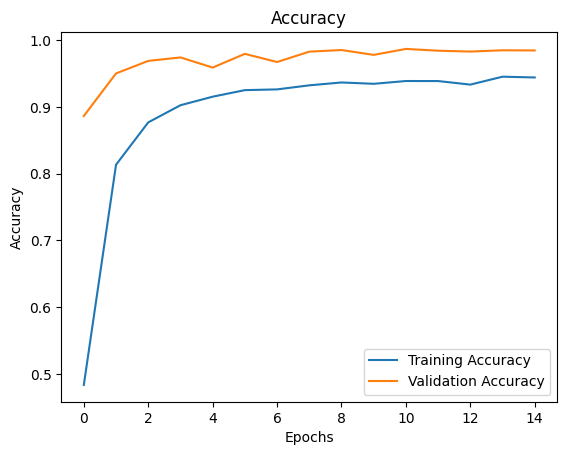

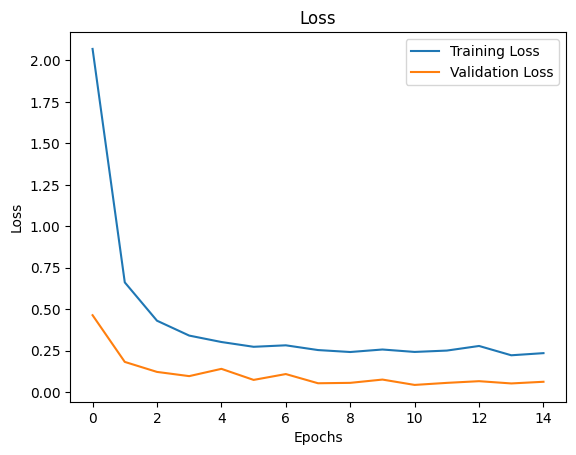

In [86]:
# Plot training and validation accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [87]:
# Load the test dataset
y_test_data = pd.read_csv('Test.csv')

labels = y_test_data["ClassId"].values
imgs = y_test_data["Path"].values

test_data = []

# Prepare test data
for img in imgs:
    image = Image.open(img)
    image = image.resize((30, 30))
    test_data.append(np.array(image))

X_test = np.array(test_data)

# Make predictions using the model
predictions = model.predict(X_test)

# Convert the predictions to class labels by taking the argmax (index of the highest value)
predictions = np.argmax(predictions, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
print(f"Test Accuracy: {accuracy_score(labels, predictions):.2f}")


395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Test Accuracy: 0.96


In [88]:
# Calculate metrics
test_accuracy = accuracy_score(labels, predictions)
test_f1 = f1_score(labels, predictions, average='weighted')

In [89]:
# Print metrics
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test F1-Score: {test_f1:.2f}")
print("\nClassification Report:")
print(classification_report(labels, predictions))

Test Accuracy: 0.96
Test F1-Score: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        60
           1       0.98      0.98      0.98       720
           2       0.96      0.98      0.97       750
           3       0.98      0.94      0.96       450
           4       0.98      0.97      0.97       660
           5       0.91      0.97      0.94       630
           6       0.99      0.89      0.94       150
           7       0.99      0.97      0.98       450
           8       0.96      0.96      0.96       450
           9       0.97      1.00      0.98       480
          10       0.98      0.97      0.98       660
          11       0.99      0.92      0.95       420
          12       0.99      0.93      0.96       690
          13       1.00      0.99      1.00       720
          14       0.99      1.00      0.99       270
          15       0.92      1.00      0.96       210
          16     

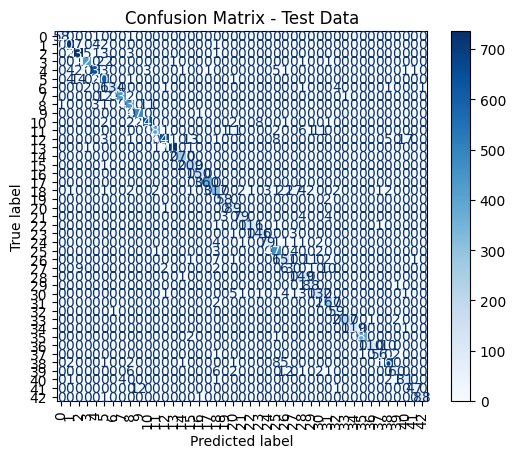

In [90]:
# Confusion Matrix
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(classes))
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Confusion Matrix - Test Data")
plt.show()

In [93]:
# Create Metrics Table
test_metrics_data = {
    "Metric": ["Accuracy", "F1-Score" , "Training Time (s)"],
    "Value": [test_accuracy, test_f1 , training_time]
}
test_metrics_df = pd.DataFrame(test_metrics_data)

# Display Metrics Table
print("\nTest Metrics Summary:")
print(test_metrics_df)


Test Metrics Summary:
              Metric       Value
0           Accuracy    0.956295
1           F1-Score    0.956337
2  Training Time (s)  380.866910
